<a href="https://colab.research.google.com/github/onurtoker/HAPTIC/blob/main/Open3D_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open3D Tutorial (Onur Toker, April 14, 2022)


# Install Open3D

In [ ]:
!pip install open3d


# Standart imports

In [ ]:
import numpy as np
import cv2

import open3d as o3d

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# Read Point Cloud (No triangles)

In [ ]:
!rm bunny.pcd
!wget https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd

cloud = o3d.io.read_point_cloud("bunny.pcd")
if cloud.is_empty(): exit()

# cloud.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))



---


# Visualize using Matplotlib
In this section, it will visualize point cloud as a scatter plot using matplotlib.  
It works fine in inside Jupyter and Goolge Colab. But, it is image.


In [ ]:
points = np.asarray(cloud.points)

colors = None
if cloud.has_colors():
    colors = np.asarray(cloud.colors)
elif cloud.has_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(cloud.normals) * 0.5
else:
    cloud.paint_uniform_color((1.0, 0.0, 0.0))
    colors = np.asarray(cloud.colors)

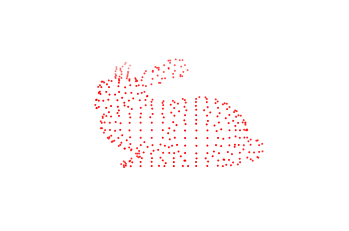

In [ ]:
# Single View
ax = plt.axes(projection='3d')
ax.view_init(90, -90)
ax.axis("off")
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()



---


# Visualize with Plotly


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0], y=points[:,1], z=points[:,2], 
            mode='markers',
            marker=dict(size=1, color=colors)
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()

### *Read Triangular Mesh (No texture)*

In [ ]:
!rm bunny.obj
!wget https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj

mesh = o3d.io.read_triangle_mesh("bunny.obj")
if mesh.is_empty(): exit()

if not mesh.has_vertex_normals(): mesh.compute_vertex_normals()
if not mesh.has_triangle_normals(): mesh.compute_triangle_normals()

--2022-04-15 01:07:57--  https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj
Resolving graphics.stanford.edu (graphics.stanford.edu)... 171.67.77.70
Connecting to graphics.stanford.edu (graphics.stanford.edu)|171.67.77.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205917 (201K) [text/plain]
Saving to: ‘bunny.obj’

bunny.obj           100%[===================>] 201.09K   210KB/s    in 1.0s    

2022-04-15 01:07:58 (210 KB/s) - ‘bunny.obj’ saved [205917/205917]



In [ ]:
triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)
colors = None
if mesh.has_triangle_normals():
    colors = (0.8, 0.0, 0.0) + np.asarray(mesh.triangle_normals) * 0.2
    colors = tuple(map(tuple, colors))


In [ ]:
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=vertices[:,0],
            y=vertices[:,1],
            z=vertices[:,2],
            i=triangles[:,0],
            j=triangles[:,1],
            k=triangles[:,2],
            facecolor=colors,
            opacity=1.00)
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)

fig.update_layout(
    autosize=False,
    height=800,
)

fig.show()



---


## Use Plotly like o3d.visualization.draw_geometries()

In [ ]:
def draw_geometries(geometries):
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()
        
        if geometry_type == o3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            # elif geometry.has_normals():
            #     colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
            else:
                geometry.paint_uniform_color((1.0, 0.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=1, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == o3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (1.0, 0.0, 0.0)
            
            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)
        
    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            )
        )
    )
    fig.show()

In [ ]:
o3d.visualization.draw_geometries = draw_geometries # replace function
# o3d.visualization.draw_geometries([cloud])
o3d.visualization.draw_geometries([mesh])